In [2]:
from keras.datasets import fashion_mnist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
(X_trg, y_trg), (X_tst, y_tst) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
print(f"Shape of training dataset: {X_trg.shape}")
print(f"Shape of testing dataset: {X_tst.shape}")
print("__________________________________________________")
print(f"Shape of training target dataset: {X_trg.shape}")
print(f"Shape of training target dataset: {X_trg.shape}")
print("__________________________________________________")

Shape of training dataset: (60000, 28, 28)
Shape of testing dataset: (10000, 28, 28)
__________________________________________________
Shape of training target dataset: (60000, 28, 28)
Shape of training target dataset: (60000, 28, 28)
__________________________________________________


In [39]:
X_tst.ndim

3

In [48]:
X_test = np.reshape(X_tst, (10000, 784))
print("Shape of the reshaped images: ", X_test.shape)

Shape of the reshaped images:  (10000, 784)


Cosine Similarity

In [6]:
cos_simi = cosine_similarity(X_test)

In [7]:
cos_simi

array([[1.        , 0.53737176, 0.29959086, ..., 0.41691091, 0.29104272,
        0.75233371],
       [0.53737176, 1.        , 0.57679881, ..., 0.51693626, 0.5259895 ,
        0.60401192],
       [0.29959086, 0.57679881, 1.        , ..., 0.5212979 , 0.77687777,
        0.38123159],
       ...,
       [0.41691091, 0.51693626, 0.5212979 , ..., 1.        , 0.46994367,
        0.38640914],
       [0.29104272, 0.5259895 , 0.77687777, ..., 0.46994367, 1.        ,
        0.3511436 ],
       [0.75233371, 0.60401192, 0.38123159, ..., 0.38640914, 0.3511436 ,
        1.        ]])

In [8]:
print(f"Shape of cosine similarity matrix is: {cos_simi.shape}")

Shape of cosine similarity matrix is: (10000, 10000)


In [9]:
cos_sim_df = pd.DataFrame(cos_simi)
cos_sim_df.shape

(10000, 10000)

In [11]:
pro_info = cos_sim_df.iloc[245].values
print(f"print info index 245 in the dataset: {pro_info}")

print info index 245 in the dataset: [0.73391198 0.72703189 0.4878277  ... 0.46116883 0.46004688 0.76807936]


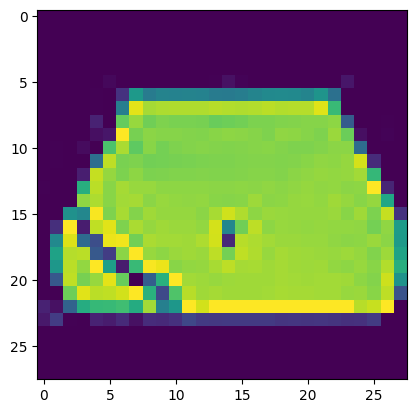

In [12]:
plt.imshow(X_tst[245])

In [13]:
index_images = np.argsort(-pro_info)[0: 10]
print("Index of similar images: ", index_images)

Index of similar images:  [ 245 8361 3602 9229 9404 7240 1103 3213 8143 6497]


Text(0.5, 0.98, 'Similar images to the index 245')

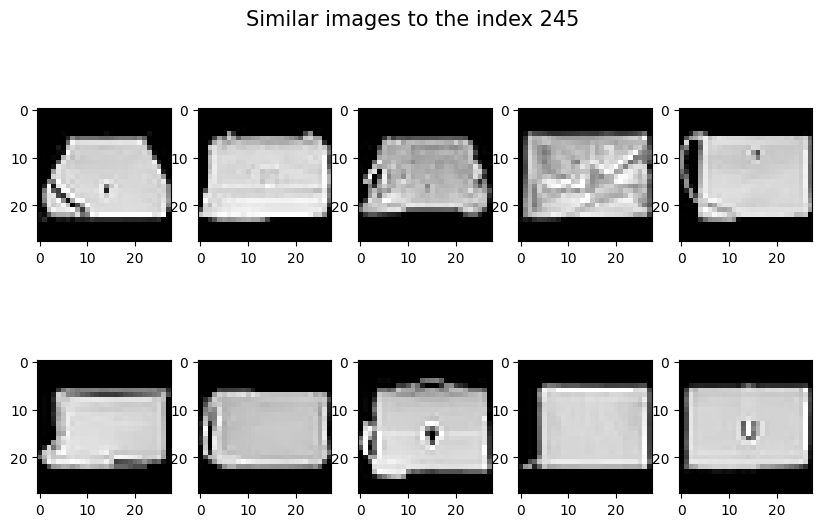

In [41]:
fix, axs = plt.subplots(2, 5, figsize=(10, 6))
for idx, i in enumerate(index_images):
    axs[idx // 5, idx%5].imshow(X_tst[i], cmap='gray')

plt.suptitle("Similar images to the index 245", fontsize=15)

Euclidian Distance

In [17]:
euclid_dis = euclidean_distances(X_test)
print("Shape of the metrix: ", euclid_dis.shape)
print("Similarity index: ", euclid_dis)

Shape of the metrix:  (10000, 10000)
Similarity index:  [[   0.         4052.72673641 3458.6190886  ... 2588.43968444
  3054.00180092 1495.7466363 ]
 [4052.72673641    0.         3962.1592598  ... 4101.74231273
  4085.4699852  4033.5728579 ]
 [3458.6190886  3962.1592598     0.         ... 2980.20469096
  2135.8874034  3139.0590947 ]
 ...
 [2588.43968444 4101.74231273 2980.20469096 ...    0.
  2753.35159397 2400.81985996]
 [3054.00180092 4085.4699852  2135.8874034  ... 2753.35159397
     0.         2701.79810497]
 [1495.7466363  4033.5728579  3139.0590947  ... 2400.81985996
  2701.79810497    0.        ]]


In [18]:
euclid_df = pd.DataFrame(euclid_dis)
euclid_df.shape

(10000, 10000)

In [23]:
sim_images = euclid_df.iloc[640].sort_values(ascending=True)[:10]
sim_images

640        0.000000
412     1185.489772
746     1200.242892
7761    1207.612107
1461    1213.964579
2502    1224.024918
8971    1231.260330
448     1233.948540
2651    1240.569224
944     1242.942477
Name: 640, dtype: float64

In [24]:
index_sim_images = sim_images.index
index_images

array([ 245, 8361, 3602, 9229, 9404, 7240, 1103, 3213, 8143, 6497])

Text(0.5, 0.98, 'Similar images to the index 640')

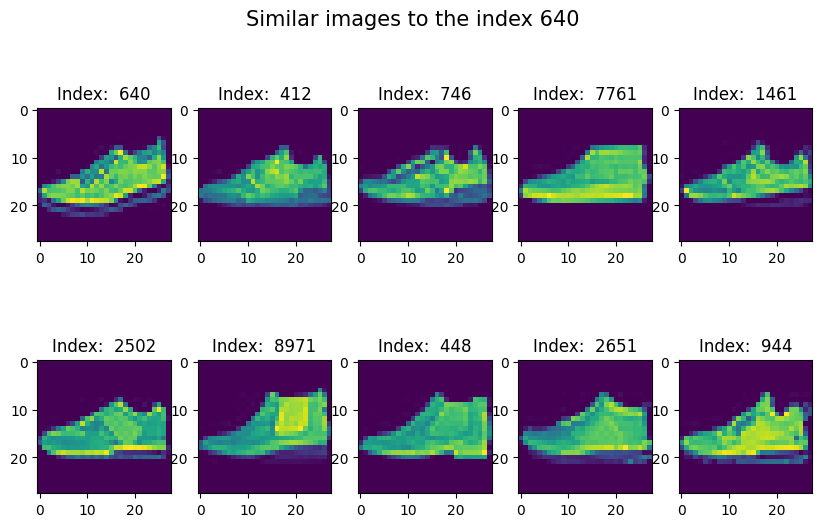

In [26]:
fig, axs = plt.subplots(2, 5, figsize=(10, 6))
for idx, i in enumerate(index_sim_images):
    axs[idx//5, idx%5].imshow(X_tst[i])
    axs[idx//5, idx%5].set_title(f"Index:  {i}")

plt.suptitle("Similar images to the index 640", fontsize=15)

Manhatten distance

In [42]:
manhatten_dis = manhattan_distances(X_test)
print("Shape of the metrix: ", manhatten_dis.shape)
print("Similarity index: ", manhatten_dis)

Shape of the metrix:  (10000, 10000)
Similarity index:  [[    0. 83718. 64230. ... 43202. 55089. 22634.]
 [83718.     0. 74808. ... 82314. 79825. 84176.]
 [64230. 74808.     0. ... 47900. 27379. 57220.]
 ...
 [43202. 82314. 47900. ...     0. 43089. 41798.]
 [55089. 79825. 27379. ... 43089.     0. 48281.]
 [22634. 84176. 57220. ... 41798. 48281.     0.]]


In [43]:
manhatten_df = pd.DataFrame(manhatten_dis)
manhatten_df.shape

(10000, 10000)

In [44]:
manhatten_sim_df = manhatten_df.iloc[1000].sort_values(ascending=True)[:10]
manhatten_sim_df

1000        0.0
1450    21279.0
5633    23283.0
5518    23605.0
5186    24098.0
9607    24555.0
4413    24578.0
1249    24741.0
4206    24819.0
4220    25209.0
Name: 1000, dtype: float64

In [45]:
mh_index = manhatten_sim_df.index
mh_index

Index([1000, 1450, 5633, 5518, 5186, 9607, 4413, 1249, 4206, 4220], dtype='int64')

Text(0.5, 0.98, 'Similar images to the index 1000')

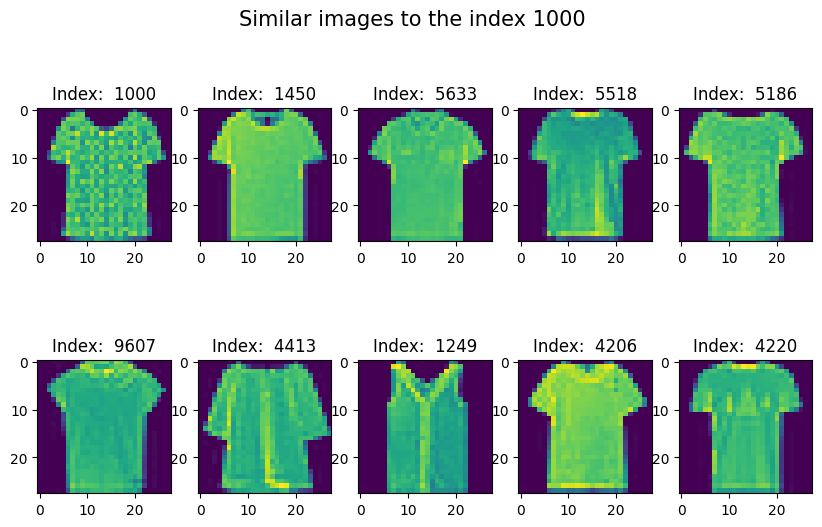

In [46]:
fig, axs = plt.subplots(2, 5, figsize=(10, 6))
for idx, i in enumerate(mh_index):
    axs[idx//5, idx%5].imshow(X_tst[i])
    axs[idx//5, idx%5].set_title(f"Index:  {i}")

plt.suptitle("Similar images to the index 1000", fontsize=15)